In [6]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn import *

%matplotlib inline

In [2]:
df = pd.read_csv("/data/iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features = ["SepalLengthCm", "PetalLengthCm"]

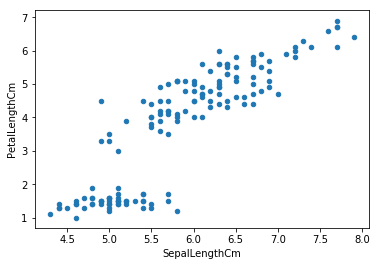

In [7]:
df[features].plot.scatter(0, 1)

In [8]:
k = 3

In [11]:
X = df[features]
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [13]:
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X)
y_pred = kmeans.predict(X) 

In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1], dtype=int32)

In [24]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
centroids


,SepalLengthCm,PetalLengthCm
0,5.005556,1.598148
1,5.873585,4.492453
2,6.858140,5.567442


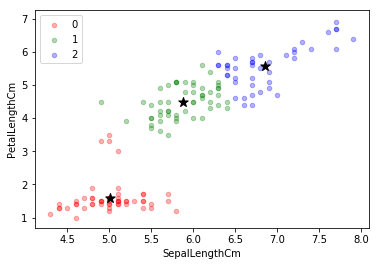

In [28]:
colors = ["red", "green", "blue"]
fig, ax = plt.subplots()

for i in range(k):
    df[y_pred == i][features].plot.scatter(0, 1, color = colors[i]
                                , ax = ax, label = i, alpha = 0.3)
    
centroids.plot.scatter(0, 1, ax = ax, color = "black", s = 100, marker = "*")

In [29]:
df["cluster"] = y_pred
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [30]:
df.cluster.value_counts()

0    54
1    53
2    43
Name: cluster, dtype: int64

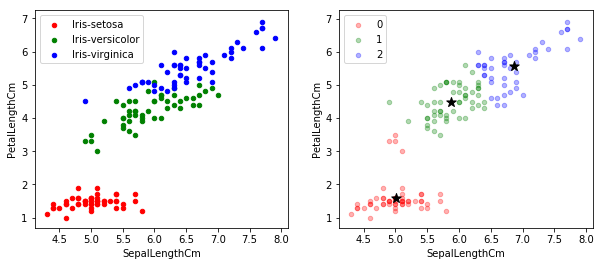

In [33]:
colors = ["red", "green", "blue"]
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

for i,v in enumerate(df.Species.unique()):
    df[df.Species == v][features].plot.scatter(0, 1, color = colors[i]
                                            , ax = axes[0], label = v)
    
for i in range(k):
    df[y_pred == i][features].plot.scatter(0, 1, color = colors[i]
                                , ax = axes[1], label = i, alpha = 0.3)
    
centroids.plot.scatter(0, 1, ax = axes[1], color = "black", s = 100, marker = "*")

In [39]:
kmeans.cluster_centers_[[0]].shape

(1, 2)

In [43]:
y_pred.shape

(150,)

In [49]:
distances = np.zeros([len(df)])

for i in range(k):
    points = X[y_pred == i]
    centroid = kmeans.cluster_centers_[[i]]
    distances[y_pred == i] = metrics.euclidean_distances(points, centroid).squeeze()
df["distance"] = distances
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0.160599
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0.170454
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0.407209
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0.494562
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0.112879


Text(0.5, 1.0, 'Histogram of distances of each point to its centroid')

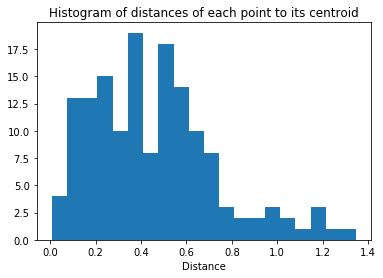

In [53]:
plt.hist(df.distance, bins = 20);
plt.xlabel("Distance")
plt.title("Histogram of distances of each point to its centroid")

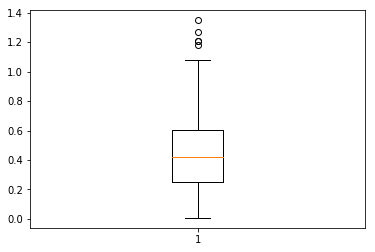

In [55]:
plt.boxplot(df.distance);

In [56]:
def outlier(y):
    q1, q3 = np.percentile(y, [25, 75])
    iqr = q3 - q1
    upper_whisker = min(np.max(y), q3 + 1.5 * iqr)
    lower_whisker = max(np.min(y), q1 - 1.5 * iqr)
    print(q1, q3, iqr, lower_whisker, upper_whisker)
    return (y > upper_whisker) | (y<lower_whisker)

In [57]:
df["outlier"] = outlier(df.distance)
df.head()

0.24906951544790507 0.6052010940968651 0.35613157864896 0.006813420341945165 1.139398462070305


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance,outlier
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,0.160599,False
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,0.170454,False
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,0.407209,False
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,0.494562,False
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,0.112879,False


In [58]:
df.outlier.value_counts()

False    145
True       5
Name: outlier, dtype: int64

In [62]:
df[df.outlier]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,distance,outlier
106,107,4.9,2.5,4.5,1.7,Iris-virginica,1,1.179680,True
117,118,7.7,3.8,6.7,2.2,Iris-virginica,2,1.206364,True
118,119,7.7,2.6,6.9,2.3,Iris-virginica,2,1.270726,True
122,123,7.7,2.8,6.7,2.0,Iris-virginica,2,1.206364,True
131,132,7.9,3.8,6.4,2.0,Iris-virginica,2,1.348258,True


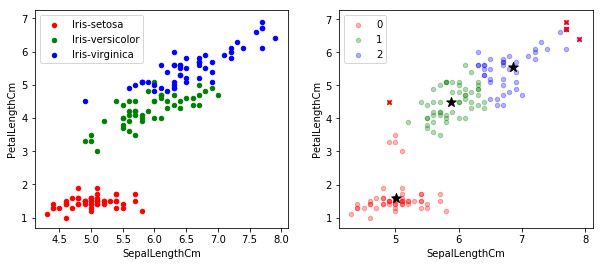

In [64]:
colors = ["red", "green", "blue"]
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

for i,v in enumerate(df.Species.unique()):
    df[df.Species == v][features].plot.scatter(0, 1, color = colors[i]
                                            , ax = axes[0], label = v)
    
for i in range(k):
    df[y_pred == i][features].plot.scatter(0, 1, color = colors[i]
                                , ax = axes[1], label = i, alpha = 0.3)
    
centroids.plot.scatter(0, 1, ax = axes[1], color = "black", s = 100, marker = "*")

df[df.outlier][features].plot.scatter(0, 1, color = "red", ax = axes[1], marker = "x")

In [63]:
df.groupby("cluster").distance.agg(["count", "mean"])

,count,mean
cluster,,
0,54,0.402361
1,53,0.435640
2,43,0.558198


In [65]:
metrics.homogeneity_score(df.Species, y_pred)

0.5826296711195839

In [66]:
kmeans.inertia_

43.03887066676178

In [67]:
(df.distance ** 2).sum()

43.03887066676177

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
